In [1]:
from kaggle_handler import handler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot
import os

plt.style.use('ggplot')
pd.set_option('display.max_columns',40)

# Downloading Dataset

In [2]:
handler('hasaanrana/diet-exercise-and-pcos-insights')

Directory 'Assets' already exists.


In [3]:
os.listdir('Assets')

['Cleaned-Data.csv']

# About Dataset
- The primary purpose of this dataset is to facilitate research and analysis on the impact of lifestyle choices on PCOS.
- This dataset serves as a valuable resource for data scientists, healthcare researchers, and students looking to explore real-world health data.
- It is designed for:
  - Exploratory Data Analysis (EDA): Understanding trends, correlations, and patterns in the data.
  - Predictive Modeling: Building machine learning models to predict PCOS based on health metrics.
  - Health Research: Supporting studies on how diet, exercise, and stress levels contribute to PCOS prevalence.
  - Awareness:Educating individuals and healthcare providers about the importance of lifestyle in managing reproductive health.

#### This Notebook will primarily focus on Exploratory Data Analysis (EDA), Health Research, and Awareness initiatives related to the dataset.

# Loading Dataset

In [4]:
df = pd.read_csv(f'Assets/{os.listdir('Assets')[0]}')

# Dataset Overview, Cleaning, and Transformation
- Understanding the Dataset
  - Data Content:
    - Description of the dataset and its variables.
  - Data Shape:
    - Number of rows and columns.
  - Column Information:
    - List of column names and their corresponding data types.
  - Statistical Summary:
    - Descriptive statistics (mean, median, standard deviation, quartiles, etc.) for each numerical column.
  - Data Visualization:
    - Heatmap: Visualize correlations between variables.
    - Histograms: Analyze the distribution of individual variables.
  - Normality Test:
    - Assess the normality of data distributions using sciepy.stats probplot model.

In [5]:
df.head(5)

,Age,Weight_kg,Height_ft,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Mental_Health,Conception_Difficulty,Insulin_Resistance,Diabetes,Childhood_Trauma,Cardiovascular_Disease,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,Diet_Fried_Food,Diet_Tea_Coffee,Diet_Multivitamin,Vegetarian,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication
0,20-25,66.0,157.48,Unmarried,No,No,Yes,No,No,No,Yes,No,No,No,No,No,7,7,2,2,3,1,7,3,3,7,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,No,No,Somewhat,No.
1,Less than 20,56.0,165.10,Unmarried,No,No,No,No,No,No,No,No,No,No,No,No,4,4,4,4,4,2,4,0,1,0,0,No,Daily,No Exercise,Less than 30 minutes,6-8 hours,No,No,Somewhat,No.
2,Less than 20,89.0,167.64,Unmarried,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes,No,6,2,1,3,2,1,7,1,3,7,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.
3,20-25,55.0,160.02,Unmarried,No,Yes,No,Yes,No,Yes,Yes,"Yes, not diagnosed by a doctor",No,No,Yes,No,2,3,1,2,5,3,5,5,5,7,1,No,Never,No Exercise,Not Applicable,6-8 hours,Yes,No,Somewhat,No.
4,Less than 20,55.0,160.02,Unmarried,No,No,No,No,No,No,Yes,No,No,No,Yes,No,4,7,2,3,4,4,6,2,3,5,0,No,Daily,"Cardio (e.g., running, cycling, swimming)",30 minutes to 1 hour,6-8 hours,Yes,No,Not at All,No.


In [6]:
df.shape

(173, 36)

In [7]:
df.columns

Index(['Age', 'Weight_kg', 'Height_ft', 'Marital_Status', 'PCOS',
       'Family_History_PCOS', 'Menstrual_Irregularity', 'Hormonal_Imbalance',
       'Hyperandrogenism', 'Hirsutism', 'Mental_Health',
       'Conception_Difficulty', 'Insulin_Resistance', 'Diabetes',
       'Childhood_Trauma', 'Cardiovascular_Disease', 'Diet_Bread_Cereals',
       'Diet_Milk_Products', 'Diet_Fruits', 'Diet_Vegetables',
       'Diet_Starchy_Vegetables', 'Diet_NonStarchy_Vegetables', 'Diet_Fats',
       'Diet_Sweets', 'Diet_Fried_Food', 'Diet_Tea_Coffee',
       'Diet_Multivitamin', 'Vegetarian', 'Exercise_Frequency',
       'Exercise_Type', 'Exercise_Duration', 'Sleep_Hours', 'Stress_Level',
       'Smoking', 'Exercise_Benefit', 'PCOS_Medication'],
      dtype='object')

### Column Descriptions
- Hyperandrogenism: A condition characterized by excessive production of androgens (male sex hormones) in the body.
- Hirsutism: A condition causing excessive hair growth in women, typically in areas where men usually have more hair.
- Conception_Difficulty: Also known as infertility, this refers to the inability to conceive after a period of unprotected sexual intercourse.
- Insulin Resistance: A condition where the body's cells do not effectively respond to insulin, the hormone responsible for regulating blood sugar levels.
- Cardiovascular_Disease: A group of conditions affecting the heart and blood vessels, including heart disease, stroke, and high blood pressure.

### Column Name Correction
- The column 'Height_ft' appears to contain height values in centimeters (cm), despite its name.
- Action: Rename the column to accurately reflect the unit of measurement. For example, 'Height_cm'

In [8]:
df.rename(columns={'Height_ft':'Height_cm'}, inplace=True)

## Optimize Data Types for Memory Efficiency
- Evaluate current data types of each column.
- Convert data types to more memory-efficient alternatives where possible (e.g., from float64 to float32, from int64 to int32 if appropriate).

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         173 non-null    object 
 1   Weight_kg                   173 non-null    float64
 2   Height_cm                   173 non-null    float64
 3   Marital_Status              173 non-null    object 
 4   PCOS                        173 non-null    object 
 5   Family_History_PCOS         173 non-null    object 
 6   Menstrual_Irregularity      173 non-null    object 
 7   Hormonal_Imbalance          173 non-null    object 
 8   Hyperandrogenism            173 non-null    object 
 9   Hirsutism                   173 non-null    object 
 10  Mental_Health               173 non-null    object 
 11  Conception_Difficulty       173 non-null    object 
 12  Insulin_Resistance          173 non-null    object 
 13  Diabetes                    173 non

In [10]:
Diet_col_list = ['Diet_Bread_Cereals',
       'Diet_Milk_Products', 'Diet_Fruits', 'Diet_Vegetables',
       'Diet_Starchy_Vegetables', 'Diet_NonStarchy_Vegetables', 'Diet_Fats',
       'Diet_Sweets', 'Diet_Fried_Food', 'Diet_Tea_Coffee',
       'Diet_Multivitamin']
df[['Weight_kg', 'Height_cm']] = df[['Weight_kg', 'Height_cm']].astype('float32')
df[Diet_col_list] = df[Diet_col_list].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         173 non-null    object 
 1   Weight_kg                   173 non-null    float32
 2   Height_cm                   173 non-null    float32
 3   Marital_Status              173 non-null    object 
 4   PCOS                        173 non-null    object 
 5   Family_History_PCOS         173 non-null    object 
 6   Menstrual_Irregularity      173 non-null    object 
 7   Hormonal_Imbalance          173 non-null    object 
 8   Hyperandrogenism            173 non-null    object 
 9   Hirsutism                   173 non-null    object 
 10  Mental_Health               173 non-null    object 
 11  Conception_Difficulty       173 non-null    object 
 12  Insulin_Resistance          173 non-null    object 
 13  Diabetes                    173 non

## Cleaning and Transforming Object-Type Data

### Description

In [11]:
df.describe(include=['object'])

,Age,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Mental_Health,Conception_Difficulty,Insulin_Resistance,Diabetes,Childhood_Trauma,Cardiovascular_Disease,Vegetarian,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication
count,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173
unique,6,3,3,3,2,4,2,3,2,4,3,3,3,3,2,5,12,5,4,2,2,4,9
top,20-25,Unmarried,No,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,Rarely,No Exercise,Not Applicable,6-8 hours,Yes,No,Somewhat,No.
freq,102,156,134,146,101,97,149,123,123,149,151,169,106,167,157,80,74,68,110,114,171,110,165


### Analysis of Categorical Variables
- Unique Values:
- Value Counts:

In [12]:
obj_type_colls = ['Age','Marital_Status', 'PCOS',
       'Family_History_PCOS', 'Menstrual_Irregularity', 'Hormonal_Imbalance',
       'Hyperandrogenism', 'Hirsutism', 'Mental_Health',
       'Conception_Difficulty', 'Insulin_Resistance', 'Diabetes',
       'Childhood_Trauma', 'Cardiovascular_Disease', 'Vegetarian', 'Exercise_Frequency',
       'Exercise_Type', 'Exercise_Duration', 'Sleep_Hours', 'Stress_Level',
       'Smoking', 'Exercise_Benefit', 'PCOS_Medication']

In [13]:
for coll in obj_type_colls:
    print(df[coll].value_counts(), end='\n\n\n')

Age
20-25           102
Less than 20     57
45 and above      4
35-44             4
25-30             4
30-35             2
Name: count, dtype: int64


Marital_Status
Unmarried    156
Married       16
Widow          1
Name: count, dtype: int64


PCOS
No                                    134
Yes                                    38
No, Yes, not diagnosed by a doctor      1
Name: count, dtype: int64


Family_History_PCOS
No                                                            146
Yes                                                            26
Yes, not diagnosed by a doctor, Yes, diagnosed by a doctor      1
Name: count, dtype: int64


Menstrual_Irregularity
Yes    101
No      72
Name: count, dtype: int64


Hormonal_Imbalance
Yes                                                           97
No                                                            74
No, Yes, not diagnosed by a doctor                             1
Yes, not diagnosed by a doctor, Yes, diagnosed by a doctor    

### Handling 'Yes/No' Type Columns
- Assumption: Given limited information, we will assume that the 'Yes/No' column indicates the presence or absence of a specific condition ("not diagnosed by a doctor" / "diagnosed by a doctor") for an individual.
- Data Handling:
  - If a row contains multiple conditions (e.g., "Yes, Yes"), it will be interpreted as representing multiple individuals.
  - The row will be split into multiple rows, each representing a single individual with the corresponding 'Yes/No' value for the specific condition.

In [14]:
Yes_No_Coll = ['PCOS','Family_History_PCOS','Menstrual_Irregularity', 'Hormonal_Imbalance','Hyperandrogenism',
               'Hirsutism','Mental_Health','Conception_Difficulty','Insulin_Resistance','Diabetes','Childhood_Trauma',
               'Cardiovascular_Disease','Vegetarian','Stress_Level','Smoking']
df[Yes_No_Coll] = df[Yes_No_Coll].replace({', not diagnosed by a doctor':"",', diagnosed by a doctor':""}, regex=True)
for coll in Yes_No_Coll:
    df[coll] = df[coll].str.split(", ")
    df = df.explode(coll).reset_index(drop=True)

### Handling the 'Exercise_Type' Column
- Identify Unique Exercise Types: Determine the unique exercise types listed in the column.
- Standardize Exercise Type Names:
  - Group similar exercise types together (e.g., "Jogging", "Running", and "Sprinting" could be grouped under "Running")

In [15]:
df['Exercise_Type'].unique()

array(['Cardio (e.g., running, cycling, swimming)', 'No Exercise',
       'Cardio (e.g., running, cycling, swimming), Strength training (e.g., weightlifting, resistance exercises)',
       'Flexibility and balance (e.g., yoga, pilates)',
       'High-intensity interval training (HIIT)',
       'Cardio (e.g., running, cycling, swimming), Flexibility and balance (e.g., yoga, pilates)',
       'Cardio (e.g., running, cycling, swimming), Strength training (e.g., weightlifting, resistance exercises), Flexibility and balance (e.g., yoga, pilates)',
       'Strength training (e.g., weightlifting, resistance exercises), Flexibility and balance (e.g., yoga, pilates)',
       'Strength training (e.g., weightlifting, resistance exercises)',
       'Flexibility and balance (e.g., yoga, pilates), None',
       'Cardio (e.g., running, cycling, swimming), Strength training (e.g., weightlifting, resistance exercises), High-intensity interval training (HIIT)',
       'Cardio (e.g., running, cycling, sw

In [16]:
Exercise = {'No Exercise', 'Strength training', 'Flexibility and balance', 'High-intensity interval training'}
df['Exercise'] = df['Exercise_Type'].str.findall("Cardio")
for Ex in Exercise:
    df['Exercise'] = df['Exercise'] + df['Exercise_Type'].str.findall(Ex)
df.drop(columns=['Exercise_Type'], inplace=True)
obj_type_colls.remove('Exercise_Type')
df['Exercise'] = df['Exercise'].apply(lambda lis: ", ".join(lis))
df["Exercise"].value_counts()

Exercise
No Exercise                                                    76
Cardio                                                         61
Flexibility and balance                                        20
Strength training                                              16
Cardio, Flexibility and balance                                 4
Cardio, Strength training                                       4
High-intensity interval training                                3
Cardio, Flexibility and balance, Strength training              3
Flexibility and balance, Strength training                      1
Cardio, Strength training, High-intensity interval training     1
Name: count, dtype: int64

### Handling the 'Exercise_Duration' Column
- Issue: The current 'Exercise_Duration' column contain inconsistent or overlapping categories (e.g., "30 minutes to 1 hour" and "more than 30 minutes")

In [17]:
df['Exercise_Duration'].unique()

array(['30 minutes', 'Less than 30 minutes', 'Not Applicable',
       '30 minutes to 1 hour', 'More than 30 minutes'], dtype=object)

In [18]:
df['Exercise_Duration'] = df['Exercise_Duration'].replace({'30 minutes to 1 hour':'More than 30 minutes'})
df['Exercise_Duration'].unique()

array(['30 minutes', 'Less than 30 minutes', 'Not Applicable',
       'More than 30 minutes'], dtype=object)

## Analysis of Numerical Variables

In [19]:
df.describe(include=['int','float'])

,Weight_kg,Height_cm,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,Diet_Fried_Food,Diet_Tea_Coffee,Diet_Multivitamin
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,56.341797,160.745697,5.333333,3.566138,3.005291,3.380952,2.978836,2.455026,4.417989,3.518519,3.121693,4.476190,1.365079
std,11.809048,7.103917,2.178229,2.543686,2.051199,1.757312,1.915662,1.693020,2.338370,2.244598,2.018796,2.770612,2.292227
min,36.000000,124.459999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,157.479996,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,55.000000,160.020004,7.000000,3.000000,3.000000,3.000000,3.000000,2.000000,5.000000,3.000000,3.000000,6.000000,0.000000
75%,63.000000,165.100006,7.000000,7.000000,4.000000,5.000000,4.000000,3.000000,7.000000,6.000000,5.000000,7.000000,2.000000
max,115.000000,182.880005,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [20]:
Numeric_colls = Diet_col_list + ['Weight_kg', 'Height_cm']
pd.DataFrame(df[Numeric_colls].var(), columns=['Variance']).sort_values(by='Variance', ascending=False)

,Variance
Weight_kg,139.453613
Height_cm,50.465633
Diet_Tea_Coffee,7.676292
Diet_Milk_Products,6.470337
Diet_Fats,5.467973
Diet_Multivitamin,5.254306
Diet_Sweets,5.038219
Diet_Bread_Cereals,4.744681
Diet_Fruits,4.207419
Diet_Fried_Food,4.075538


### Conclusion
- Wide range of weights within that group. In other words, some females in the group are much heavier or lighter than others.

## Visual Overview

### Heatmap Co-Relation

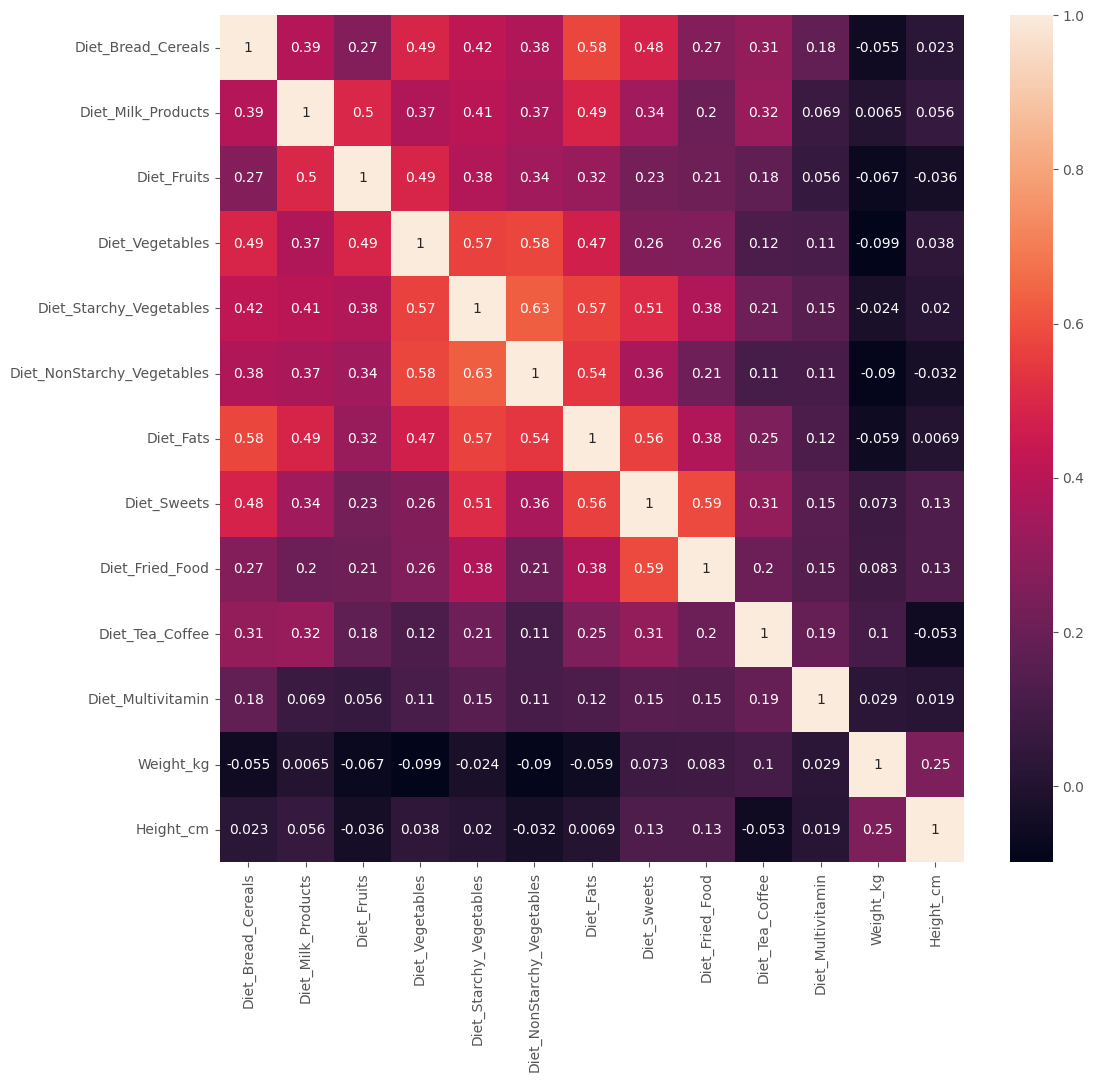

In [21]:
plt.figure(figsize=(12,11))
sns.heatmap(df[Numeric_colls].corr(), annot=True)
plt.show()

### Conclusion
- Positive Correlations Observed:
  - Some positive correlations were observed between weight and consumption of vegetables, fruits, fats, and sweets.

### Histogram

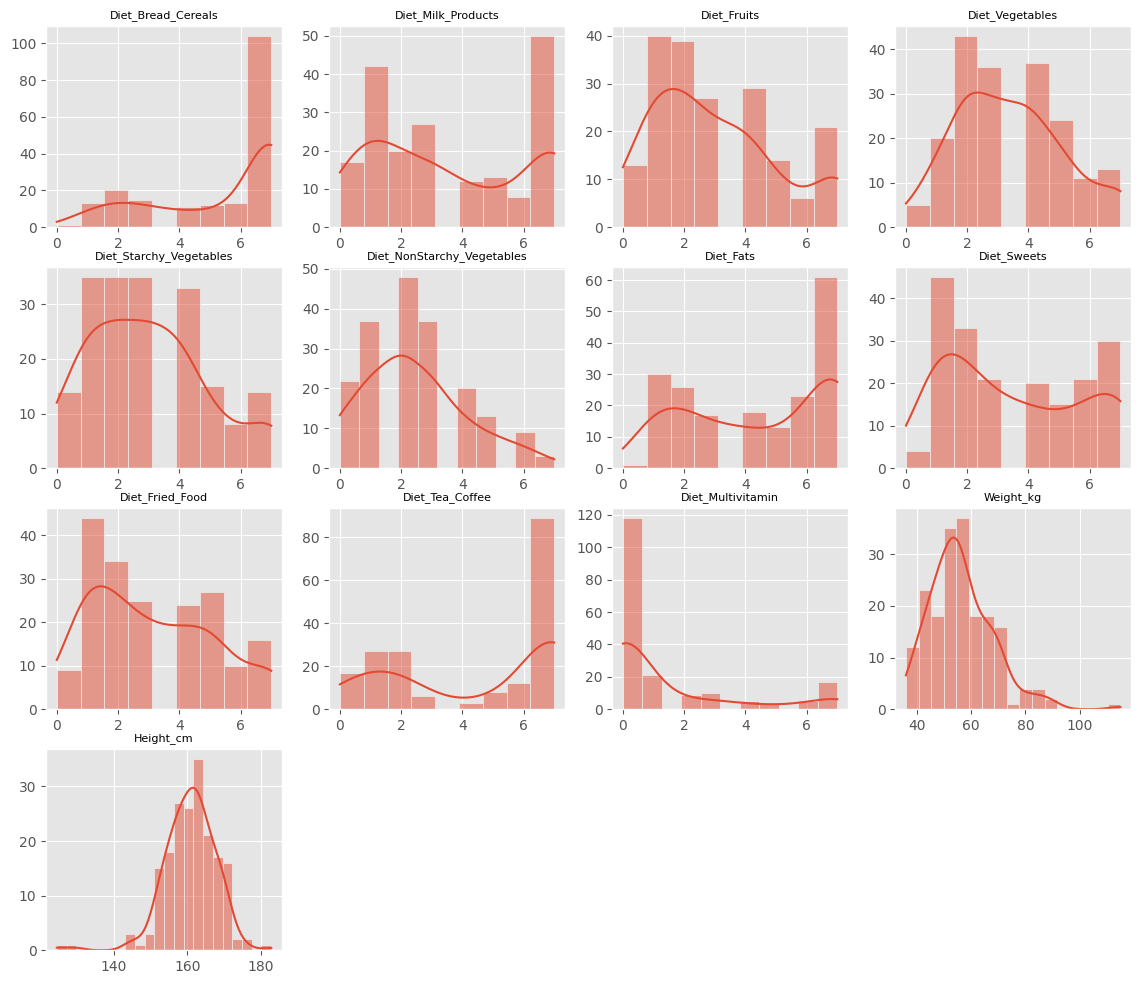

In [22]:
plt.figure(figsize=(14,12))
extra = len(Numeric_colls)%3
for cell in range(len(Numeric_colls)):
    plt.subplot(int((len(Numeric_colls)-extra)/3),4,cell+1)
    sns.histplot(df[Numeric_colls[cell]],kde=True)
    plt.title(Numeric_colls[cell], fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
plt.show()

### Normality Tests for 'Weight' and 'Height' Columns"
- Purpose:
  - Assess Normality: Determine if the distributions of 'Weight' and 'Height' in dataset follow a normal (Gaussian) distribution.

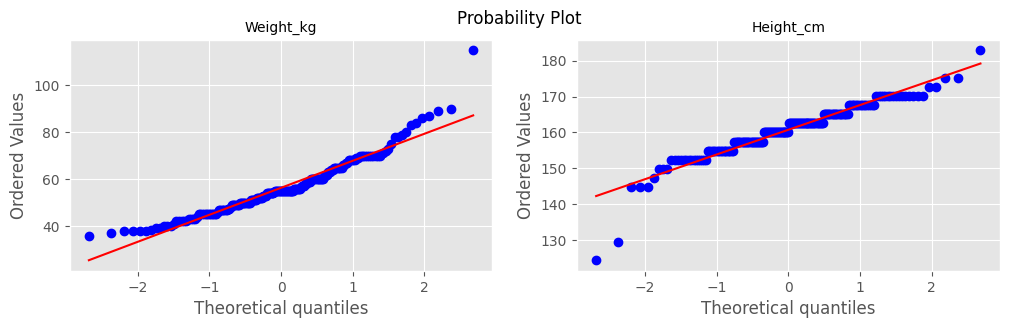

In [23]:
H_W = ["Weight_kg","Height_cm"]
plt.figure(figsize=(12,3))
for cell in range(len(H_W)):
    plt.subplot(1,2,cell+1)
    probplot(df[H_W[cell]], dist='norm', plot=plt)
    plt.title(H_W[cell], fontsize=10)
plt.suptitle("Probability Plot")
plt.show()

### Conclusion
- Normality Assessment:
  - The results suggest that both variables may exhibit some deviation from a perfectly normal distribution.
- Presence of Outliers:
  - The presence of outliers was observed in both the 'Weight' and 'Height' datasets.

# Comparative Study Between Individuals with PCOS and Those Without PCOS

## Individuals with PCOS

In [24]:
df['PCOS'].value_counts()

PCOS
No     147
Yes     42
Name: count, dtype: int64

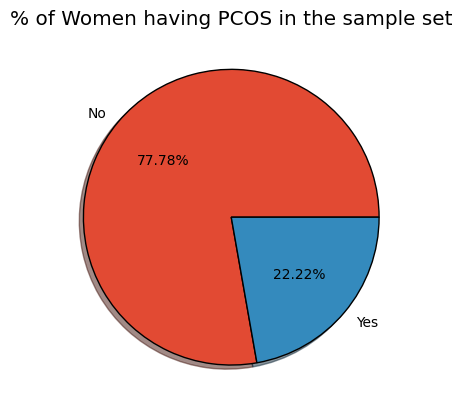

In [25]:
plt.pie(df['PCOS'].value_counts(),
       labels=df['PCOS'].unique(),
       autopct=lambda pct: str(round(pct,2))+"%",
       shadow=True,
       wedgeprops={
            "edgecolor":"black",
            "linewidth":1,
            "antialiased": True
        })
plt.title('% of Women having PCOS in the sample set')
plt.show()

### Conclusion
- Statistical Significance: The subset of the sample data representing individuals with PCOS exceeded the threshold of 30 events, allowing for statistically meaningful conclusions to be drawn about the population.
- Prevalence Estimate: Based on the analysis, approximately 22.22% of women in the population are estimated to have PCOS. This translates to approximately one in every five women.

## Comparison of Two Groups

In [26]:
PCOS_Group = df.groupby(by='PCOS')
PCOS_Yes = PCOS_Group.get_group("Yes")
PCOS_No = PCOS_Group.get_group("No")

### Comparing Correlation Coefficients

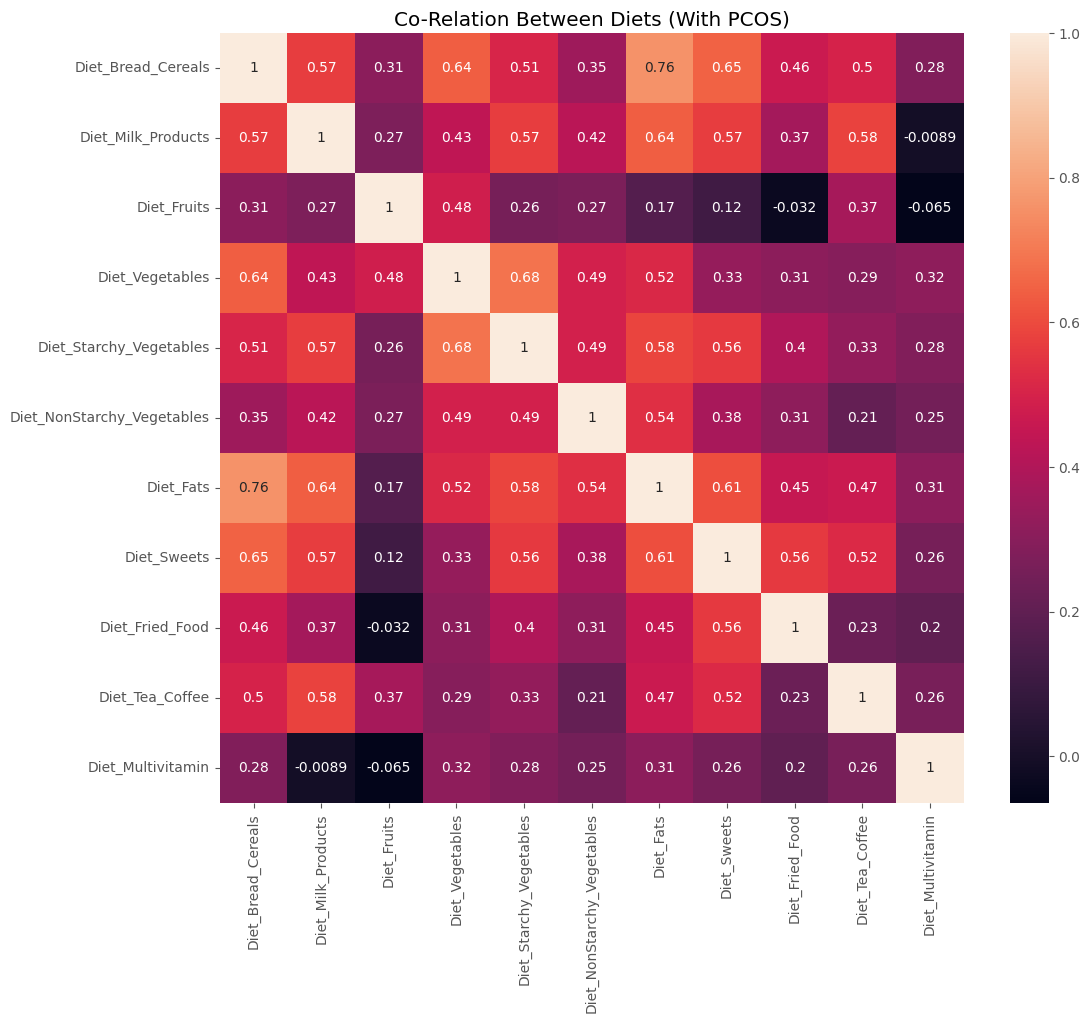

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(PCOS_Yes[Diet_col_list].corr(), annot=True)
plt.title("Co-Relation Between Diets (With PCOS)")
plt.show()

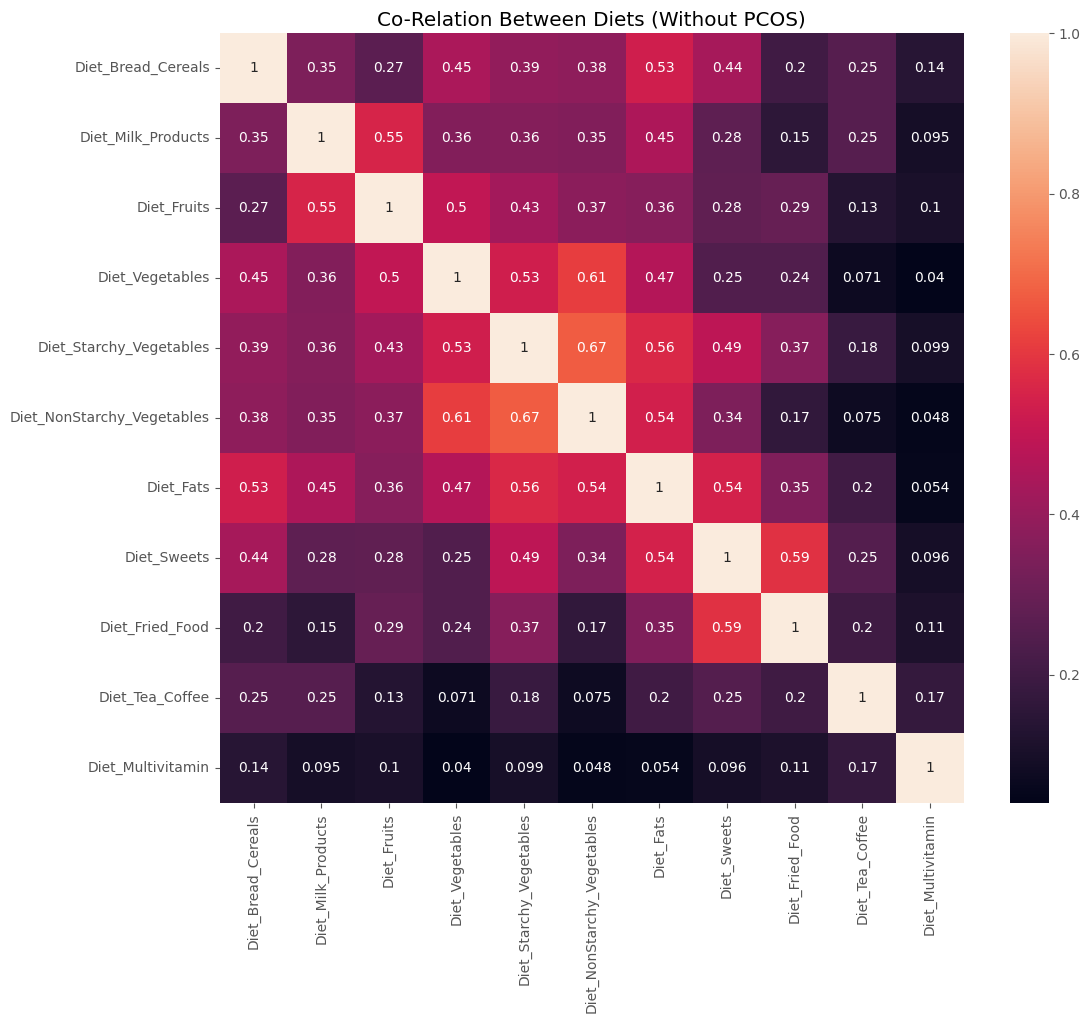

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(PCOS_No[Diet_col_list].corr(), annot=True)
plt.title("Co-Relation Between Diets (Without PCOS)")
plt.show()

### Conclusion
- Significant Dietary Differences: The analysis reveals significant dietary differences between women with PCOS and those without PCOS.
- Increased Consumption:
  - Women with PCOS appear to consume higher quantities of sweets, fried foods, tea/coffee, and multivitamins compared to women without PCOS.

### Impact on Weight

In [29]:
def box_cont(data: pd.DataFrame):
    sorted_data = data.sort_values()
    Q1, Q3 = np.quantile(sorted_data.values, [.25,.75])
    IQR = Q3-Q1
    L_F = Q1 - (1.5*IQR)
    H_F = Q3 + (1.5*IQR)
    return Q1, Q3, IQR, L_F, H_F

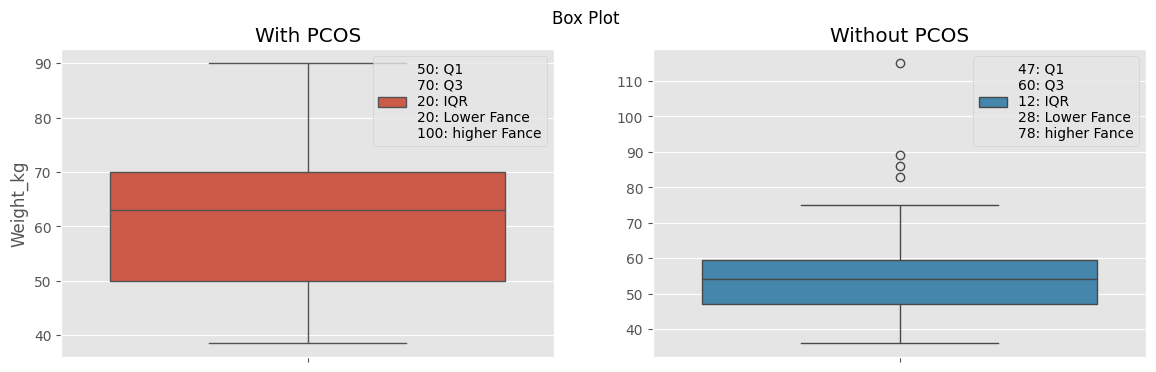

In [30]:
plt.figure(figsize=(14,4))
Q1, Q3, IQR, L_F, H_F = box_cont(PCOS_Yes['Weight_kg'])
plt.subplot(1,2,1)
sns.boxplot(PCOS_Yes['Weight_kg'],
           label='{:.0f}: Q1\n{:.0f}: Q3\n{:.0f}: IQR\n{:.0f}: Lower Fance\n{:.0f}: higher Fance'.format(Q1,Q3,IQR,L_F,H_F))
plt.title("With PCOS")
plt.legend()


Q1, Q3, IQR, L_F, H_F = box_cont(PCOS_No['Weight_kg'])
plt.subplot(1,2,2)
sns.boxplot(PCOS_No['Weight_kg'],color="C1",
           label='{:.0f}: Q1\n{:.0f}: Q3\n{:.0f}: IQR\n{:.0f}: Lower Fance\n{:.0f}: higher Fance'.format(Q1,Q3,IQR,L_F,H_F))
plt.title("Without PCOS")
plt.ylabel("")

plt.suptitle("Box Plot")
plt.legend()
plt.show()

### Conclusion
- Significant Weight Difference: A statistically significant difference in weight was observed between the two groups.
- Higher Average Weight: Women with PCOS exhibited a higher average weight compared to women without PCOS.
- Increased Weight Variability: Women with PCOS also demonstrated greater variability in weight, suggesting a wider range of weights within this group.

### Identifying Outliers in the Group Without PCOS

In [31]:
PCOS_No[PCOS_No['Weight_kg'] > 78]

,Age,Weight_kg,Height_cm,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Mental_Health,Conception_Difficulty,Insulin_Resistance,Diabetes,Childhood_Trauma,Cardiovascular_Disease,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,Diet_Fried_Food,Diet_Tea_Coffee,Diet_Multivitamin,Vegetarian,Exercise_Frequency,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication,Exercise
2,Less than 20,89.0,167.639999,Unmarried,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes,No,6,2,1,3,2,1,7,1,3,7,0,No,Rarely,Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.,Cardio
31,30-35,86.0,170.179993,Married,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,7,1,1,2,2,1,0,2,3,7,6,No,Rarely,30 minutes,6-8 hours,Yes,No,Somewhat,No.,High-intensity interval training
37,20-25,115.0,165.100006,Unmarried,No,No,Yes,No,No,No,No,No,No,No,No,No,7,7,5,5,5,4,6,6,6,7,2,No,1-2 Times a Week,More than 30 minutes,9-12 hours,Yes,No,Somewhat,No.,"Cardio, Strength training"
179,45 and above,83.0,157.479996,Married,No,No,Yes,No,No,No,Yes,No,No,No,No,No,1,1,1,1,1,1,1,1,1,1,1,No,Rarely,Not Applicable,6-8 hours,Yes,No,Not Much,No.,No Exercise


## Comparing Categorical Data Between Two Groups

### Boolean Values (Yes/No)

In [32]:
Non_Direct_catagries = ['Age','Marital_Status','Exercise_Frequency','Exercise_Duration','Sleep_Hours',
                        'Exercise_Benefit','PCOS_Medication', 'Exercise']
Boolion_call = []
for coll in obj_type_colls:
    if coll not in Non_Direct_catagries:
        Boolion_call.append(coll)

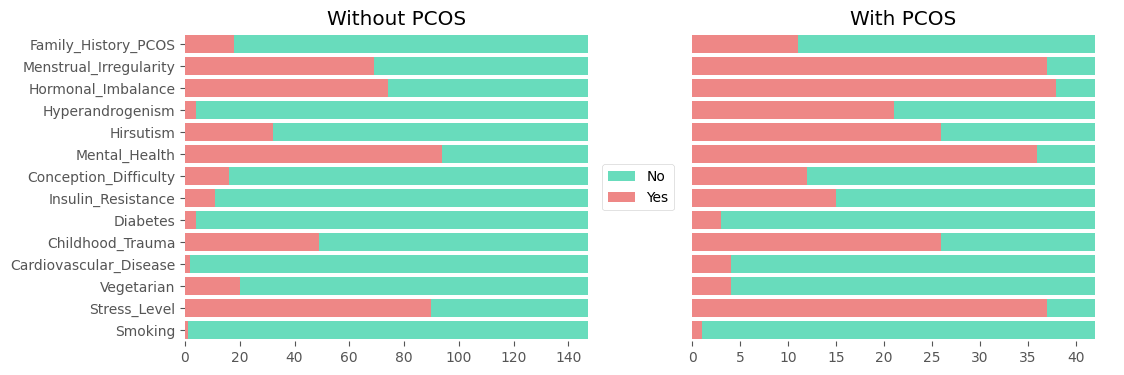

In [33]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1,facecolor='w')
new_df = pd.concat([PCOS_No[Boolion_call[1:]].count(),
                    PCOS_No[Boolion_call[1:]][PCOS_No == 'Yes'].count(),
                    PCOS_No[Boolion_call[1:]][PCOS_No == 'No'].count()], axis=1)

sns.barplot(y=new_df.index,x=0,data=new_df, color="#55efc4")
sns.barplot(y=new_df.index,x=1,data=new_df, color="#ff7675")
sns.despine(left=True, bottom=True)
plt.title("Without PCOS")
plt.xlabel("")
plt.ylabel("")

plt.subplot(1,2,2,facecolor='w')
new_df = pd.concat([PCOS_Yes[Boolion_call[1:]].count(),
                    PCOS_Yes[Boolion_call[1:]][PCOS_Yes == 'Yes'].count(),
                    PCOS_Yes[Boolion_call[1:]][PCOS_Yes == 'No'].count()], axis=1)

sns.barplot(y=new_df.index,x=0,data=new_df, color='#55efc4', label="No")
sns.barplot(y=new_df.index,x=1,data=new_df, color='#ff7675', label="Yes")
sns.despine(left=True, bottom=True)
plt.title("With PCOS")
plt.yticks([])
plt.xlabel("")
plt.ylabel("")
plt.legend(loc='center left', bbox_to_anchor=(-0.23, 0.5),facecolor='w')

plt.show()

### Conclusion
- Limited Impact of Family History: The analysis suggests that a family history of PCOS may not be a significant predictor of the condition in the current generation.
- Key PCOS-Related Issues:
  - Women with PCOS exhibited significantly higher rates of menstrual irregularities, hormonal imbalances, hyperandrogenism, hirsutism, mental health challenges, conception difficulties, insulin resistance, and an increased risk of cardiovascular disease.
- Elevated Stress Levels: A higher prevalence of childhood trauma was observed among women with PCOS.
- Limited Association:
  - Smoking, diabetes, and vegetarian dietary patterns showed limited or no significant association with PCOS in this study.

### Other Columns

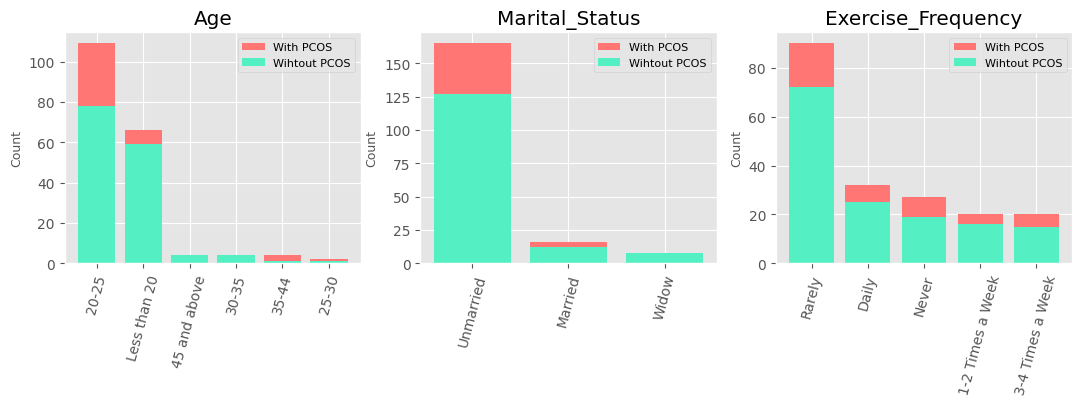

In [34]:
plt.figure(figsize=(13,3))
for i, coll in enumerate(Non_Direct_catagries[:3]):
    plt.subplot(1,3,i+1)
    plt.bar(x=df[coll].unique(),height=df[coll].value_counts(),color='#ff7675',label="With PCOS")
    plt.bar(x=df[coll].unique(),height=df[coll][df['PCOS']=="No"].value_counts(),color='#55efc4',label="Wihtout PCOS")
    plt.xticks(rotation=75)
    plt.title(coll)
    plt.ylabel("Count",fontsize=9)
    plt.legend(fontsize=8)
plt.show()

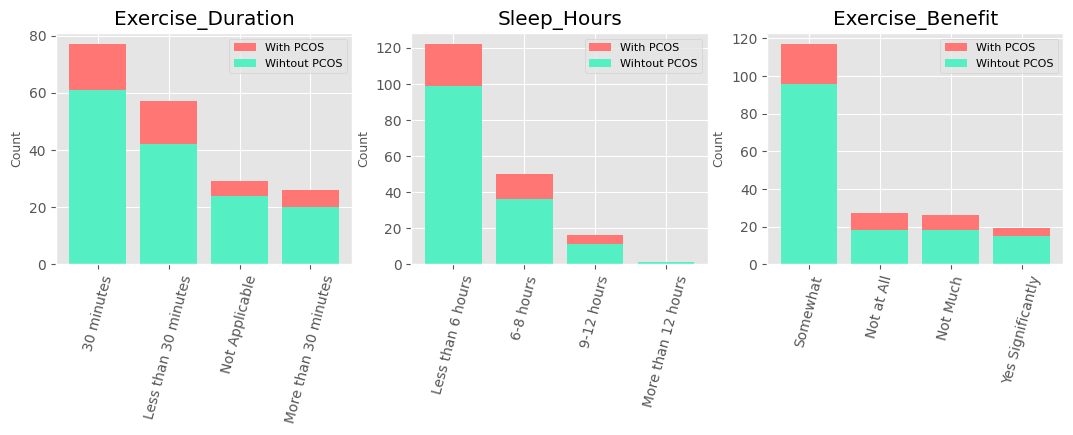

In [35]:
plt.figure(figsize=(13,3))
for i, coll in enumerate(Non_Direct_catagries[3:6]):
    plt.subplot(1,3,i+1)
    plt.bar(x=df[coll].unique(),height=df[coll].value_counts(),color='#ff7675',label="With PCOS")
    plt.bar(x=df[coll].unique(),height=df[coll][df['PCOS']=="No"].value_counts(),color='#55efc4',label="Wihtout PCOS")
    plt.xticks(rotation=75)
    plt.title(coll)
    plt.ylabel("Count",fontsize=9)
    plt.legend(fontsize=8)
plt.show()

### Impact of Exercises in PCOS

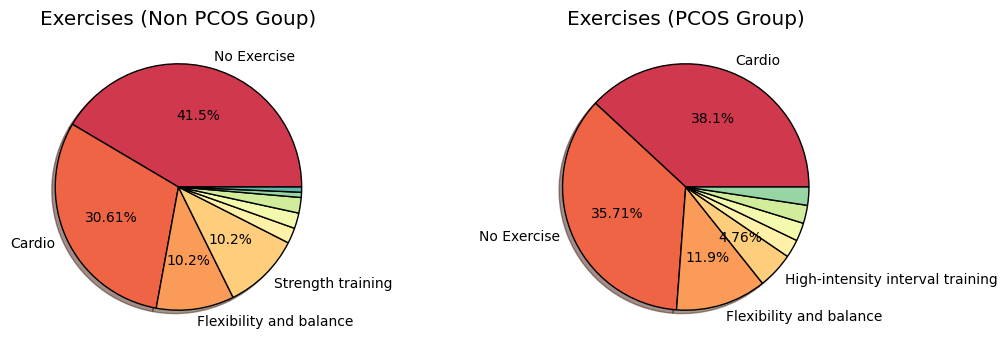

In [36]:
plt.figure(figsize=(12,4))
for i, (key, data) in enumerate(PCOS_Group):
    plt.subplot(1,2,i+1)
    wedges, texts, autotexts = plt.pie(data['Exercise'].value_counts(),
                                       labels=data['Exercise'].value_counts().index,
                                       autopct=lambda pct: (str(round(pct,2))+"%") if pct>4.5 else 0,
                                       shadow=True,
                                       colors=sns.color_palette("Spectral",10),
                                       wedgeprops={
                                            "edgecolor":"black",
                                            "linewidth":1,
                                            "antialiased": True
                                        })
    threshold = 4.5
    
    for label, pct_label in zip(texts, autotexts):
        pct_value = pct_label.get_text().rstrip('%')
        if float(pct_value) < threshold:
            label.set_text('')
            pct_label.set_text('')
    if key == 'Yes':
        plt.title('Exercises (PCOS Group)')
    else:
        plt.title('Exercises (Non PCOS Goup)')
plt.show()

### Conclusion
- Limited Difference in Exercise Patterns: No significant differences in exercise patterns were observed between the two groups.
- Low Exercise Prevalence: A majority of women in both groups reported limited exercise participation.
- Short Exercise Duration: Among those who exercise, the majority reported exercising for 30 minutes or less per session.